In [1]:
from pathlib import Path

import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd


In [2]:
raw_data = Path('/Volumes/krauss/Lisa/GMR/Array/SpecialBox/Cuthbert/250724/results_FULL/communicating_results.csv')

In [3]:
df = pd.read_csv(raw_data)
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.set_index("timestamp", inplace=True)
df.head()

ROI-label Analysis-method  amplitude       mu  \
timestamp                                                                  
2025-07-24 13:36:14.290180    001A_N        gaussian    144.829   41.363   
2025-07-24 13:36:14.290180    001A_S        gaussian     82.649   65.891   
2025-07-24 13:36:14.290180    002A_N        gaussian    103.231   62.210   
2025-07-24 13:36:14.290180    002A_S        gaussian    118.823   71.520   
2025-07-24 13:36:14.290180    003A_N        gaussian    108.429  117.455   

                             sigma  offset   error  
timestamp                                           
2025-07-24 13:36:14.290180  12.099   9.061  23.990  
2025-07-24 13:36:14.290180  26.560   6.860  15.936  
2025-07-24 13:36:14.290180  33.786   1.021  20.205  
2025-07-24 13:36:14.290180  36.561   1.152  11.227  
2025-07-24 13:36:14.290180  49.941  -3.524  14.911

In [4]:
rois = df["ROI-label"].unique()
rois = sorted(list(set([roi[:-2] for roi in rois])))
print(rois)
print(len(rois))

['001A', '001B', '002A', '002B', '003A', '003B', '004A', '004B', '005A', '005B', '006A', '006B', '007A', '007B', '011A', '011B', '012A', '012B', '013A', '013B', '014A', '014B', '015A', '015B', '016A', '016B', '017A', '017B', '018A', '021A', '021B', '022A', '022B', '023A', '023B', '024A', '024B', '025A', '025B', '026A', '026B', '027A', '027B', '031A', '031B', '032A', '032B', '033A', '033B', '034A', '034B', '035A', '035B', '036A', '036B', '037A', '037B', '038A', '040A', '040B', '041A', '041B', '042A', '042B', '043A', '043B', '044A', '044B', '045A', '045B', '046A', '046B', '047A', '047B', '050A', '050B', '051A', '051B', '052A', '052B', '053A', '053B', '054A', '054B', '055A', '055B', '056A', '056B', '057A', '057B', '058A', '060A', '060B', '061A', '061B', '062A', '062B', '063A', '063B', '064A', '064B', '065A', '065B', '066A', '066B', '067A', '067B', '070A', '070B', '071A', '071B', '072A', '072B', '073A', '073B', '074A', '074B', '075A', '075B', '076A', '076B', '077A', '077B', '078A', '080A',

In [5]:
new_cols = {}
suffix = ['_N', '_S']
final_index = None

for roi in rois:
    df_N = df[df["ROI-label"] == f"{roi}{suffix[0]}"]["mu"]
    df_S = df[df["ROI-label"] == f"{roi}{suffix[1]}"]["mu"]
    if not df_N.empty and not df_S.empty:
        combined_series = df_N.reset_index(drop=True) + df_S.reset_index(drop=True)
        new_cols[roi] = combined_series

        if final_index is None:
            final_index = df_N.index

comb_df = pd.DataFrame(new_cols)

if final_index is not None:
    comb_df.index = final_index

comb_df.head()

001A    001B     002A    002B     003A    003B  \
timestamp                                                                       
2025-07-24 13:36:14.290180  107.254  68.792  133.730  75.545  209.702  69.471   
2025-07-24 13:36:42.812805  107.104  68.971  132.793  73.530  210.416  70.850   
2025-07-24 13:37:01.558738  106.976  69.393  131.421  73.963  211.459  69.552   
2025-07-24 13:37:20.468825  106.899  70.196  132.843  74.419  209.866  68.887   
2025-07-24 13:37:39.285059  107.368  70.775  135.022  74.824  208.907  69.568   

                               004A    004B     005A    005B  ...    193B  \
timestamp                                                     ...           
2025-07-24 13:36:14.290180  178.815  71.113  169.925  65.700  ...  59.337   
2025-07-24 13:36:42.812805  177.560  70.193  166.524  66.857  ...  59.186   
2025-07-24 13:37:01.558738  179.219  70.624  167.593  66.420  ...  58.988   
2025-07-24 13:37:20.468825  177.390  72.445  169.980  67.686  ...  58.846   
2025-07-24 13:37:39.285059  176.492  72.643  169.524  68.304  ...  57.433   

                               194A    194B     195A    195B     196A    196B  \
timestamp                                                                       
2025-07-24 13:36:14.290180  180.251  31.661  155.389  63.267  179.164  84.859   
2025-07-24 13:36:42.812805  180.956  30.915  155.878  61.996  179.434  84.966   
2025-07-24 13:37:01.558738  180.615  30.640  155.807  62.846  179.277  85.582   
2025-07-24 13:37:20.468825  181.187  30.056  154.980  62.459  180.227  84.078   
2025-07-24 13:37:39.285059  180.453  29.306  156.953  60.117  179.023  84.264   

                               197A     197B     198A  
timestamp                                              
2025-07-24 13:36:14.290180  247.135  284.159  345.649  
2025-07-24 13:36:42.812805  246.469  284.264  344.638  
2025-07-24 13:37:01.558738  247.233  268.772  343.081  
2025-07-24 13:37:20.468825  248.441  285.522  344.603  
2025-07-24 13:37:39.285059  247.025  283.563  344.790  

[5 rows x 322 columns]

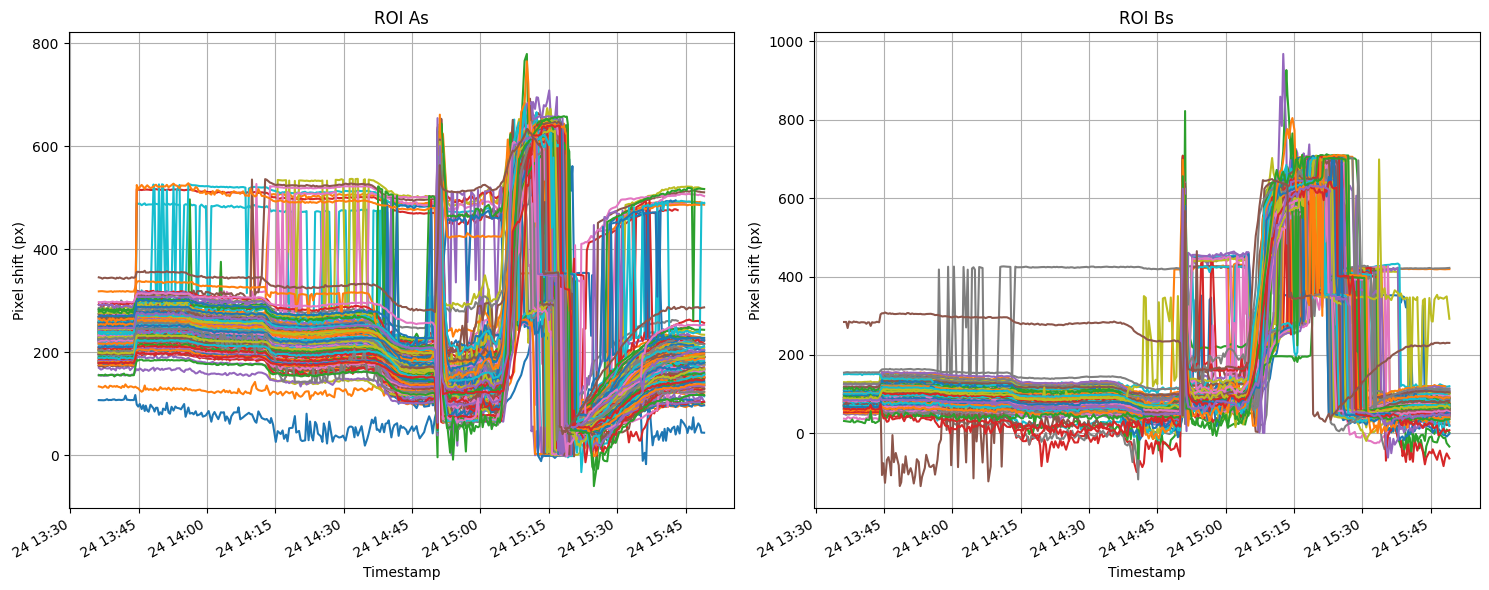

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

comb_df.loc[:, comb_df.columns.str.contains('A')].plot(
    kind='line',
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

comb_df.loc[:, comb_df.columns.str.contains('B')].plot(
    kind='line',
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

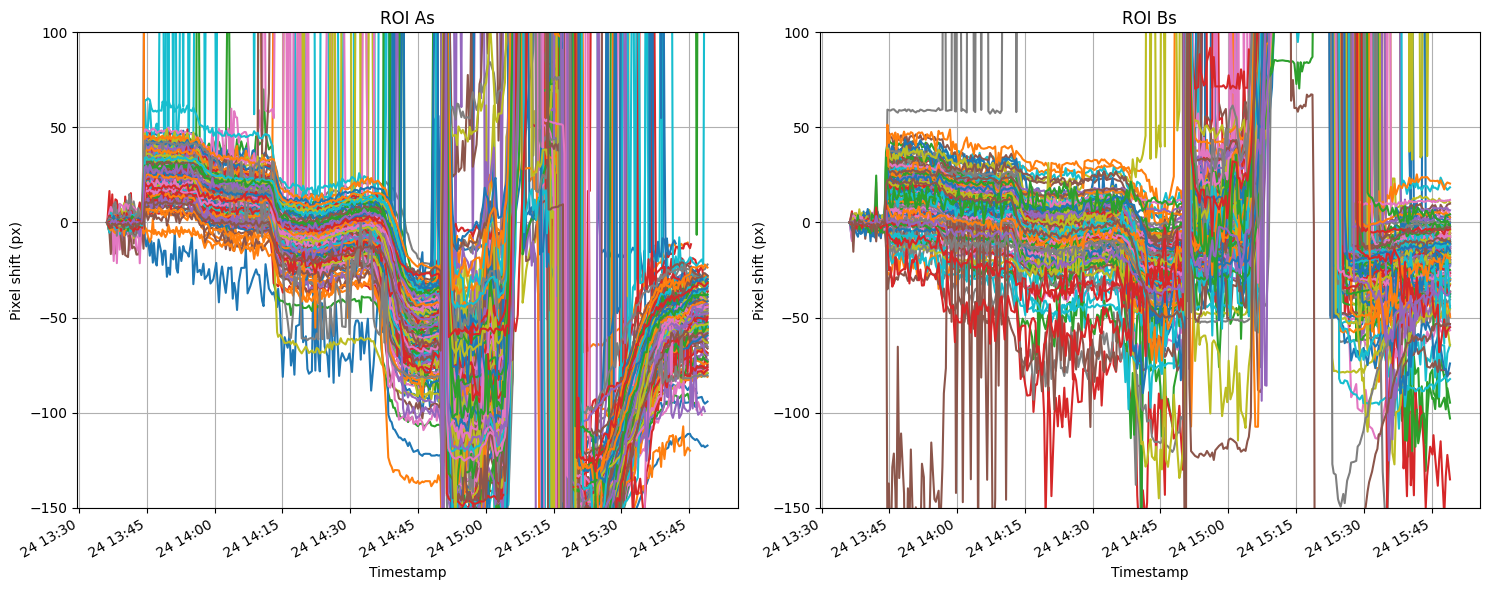

In [ ]:
y_limits = (-150, 100)
window_size = 20
normalized_df = comb_df - comb_df.iloc[0]

timewindow = slice('2025-07-24 13:45:00','2025-07-24 14:50:00')
# timewindow = slice(None, None)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

normalized_df.loc[:, normalized_df.columns.str.contains('A')][timewindow].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

normalized_df.loc[:, normalized_df.columns.str.contains('B')][timewindow].plot(
    kind='line',
    ylim=y_limits,
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

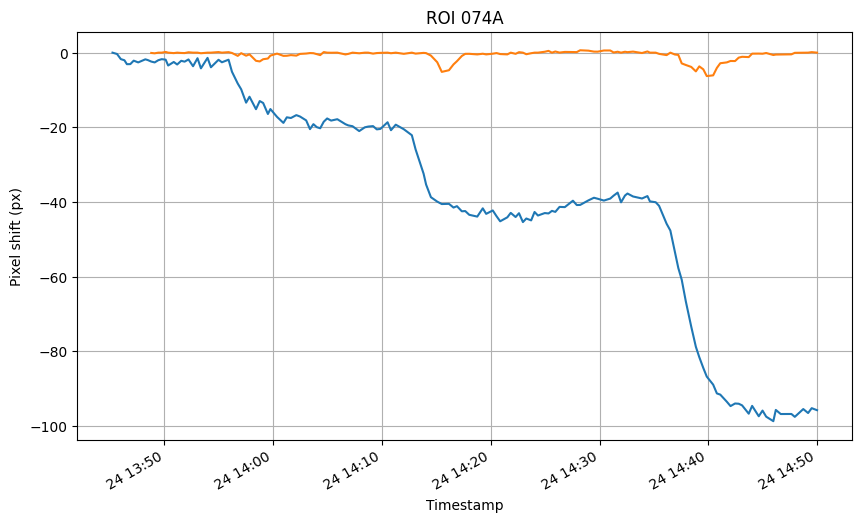

In [139]:
label = "074A"

timewindow = slice('2025-07-24 13:45:00','2025-07-24 14:50:00')

normalized_df[label][timewindow].plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)
normalized_df[label][timewindow].rolling(window=10).median().diff().plot(
    kind='line',
    figsize=(10, 6),
    title=f'ROI {label}',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)

plt.grid(True) # Add a grid for better readability
plt.show()

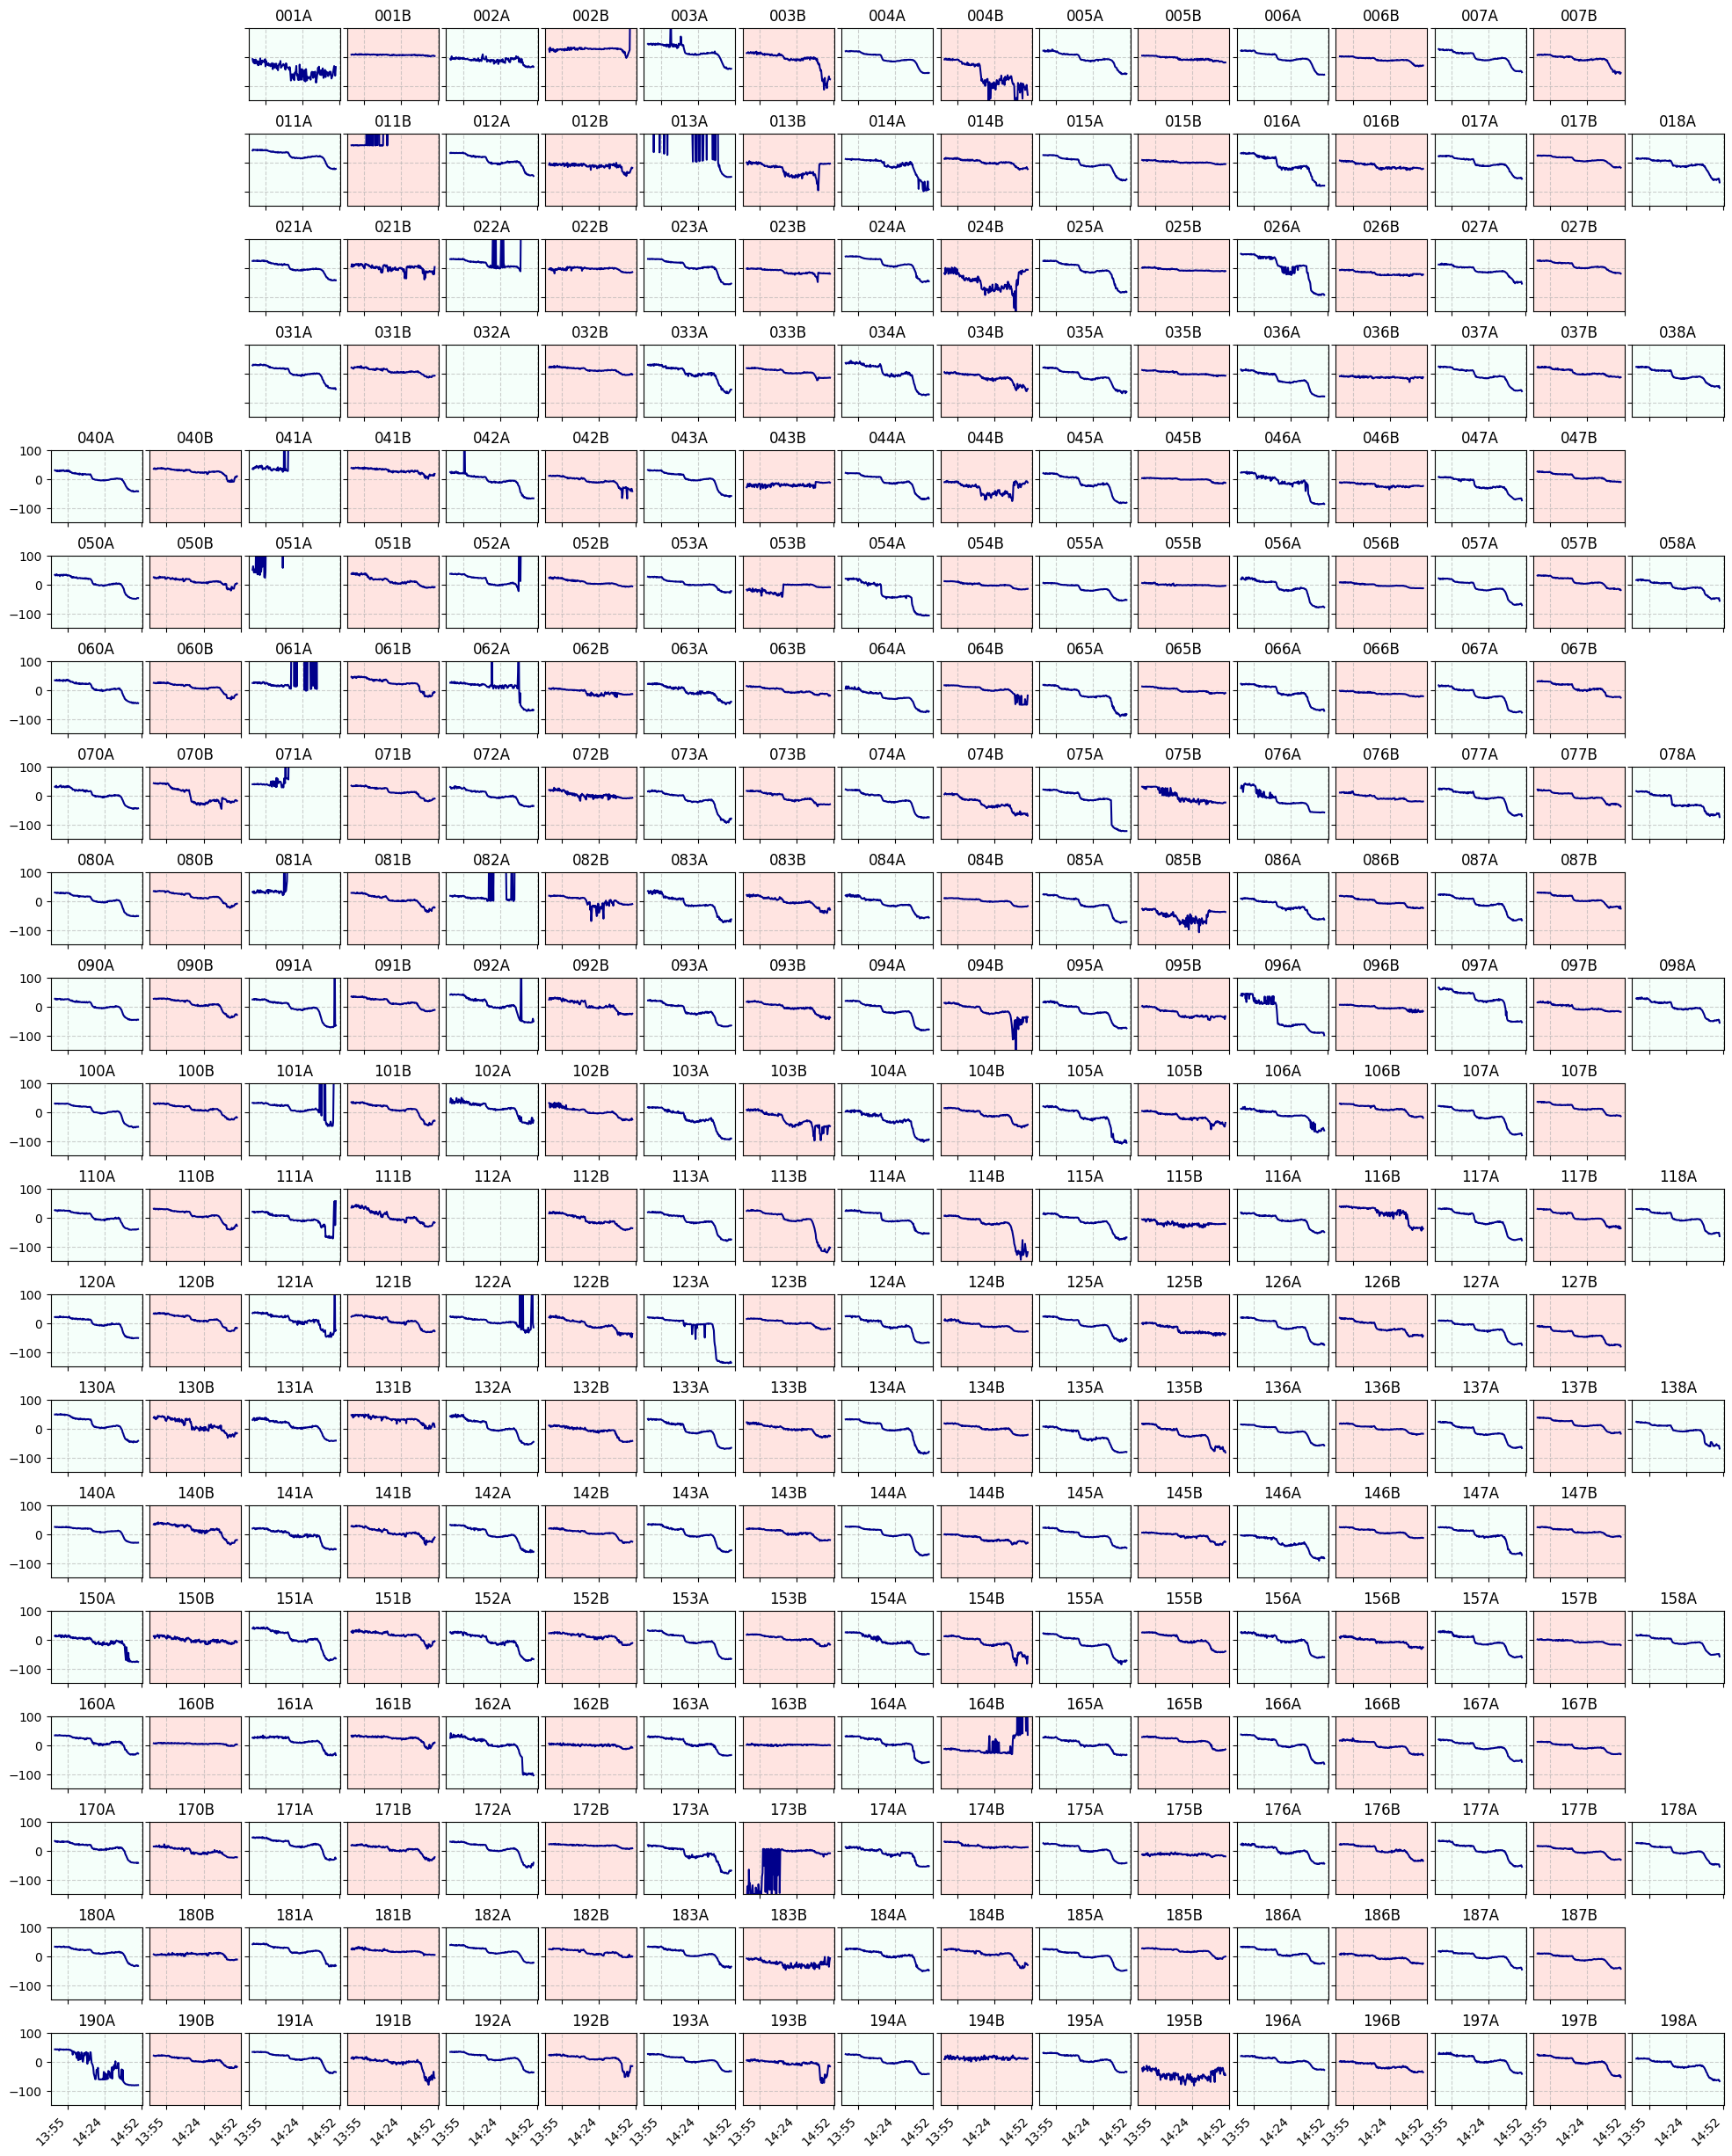

In [124]:
timewindow = slice('2025-07-24 13:45:00','2025-07-24 14:50:00')

roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))

fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(20, 30),
                       sharex=True,
                       sharey=True)

# fig.supxlabel("Timestamp")
# fig.supylabel("Pixel shift (px)")

plt.ylim(y_limits[0], y_limits[1])
ax[0, 0].xaxis.set_major_locator(mticker.MaxNLocator(nbins=3))
time_formatter = mdates.DateFormatter('%H:%M')
ax[-1, 0].xaxis.set_major_formatter(time_formatter)

type_colours = {'A': 'mintcream', 'B': 'mistyrose'}
# type_colours = {'A': 'honeydew', 'B': 'seashell'}
# type_colours = {'A': 'honeydew', 'B': 'snow'}
ax = ax.flatten()

# Turn off all axes
for a in ax:
    a.axis('off')

x_values = normalized_df[timewindow].index
count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        type_part = roi_label[-1]
        try:
            y_values = normalized_df[roi_label][timewindow].values
            ax[count].plot(x_values, y_values, color='darkblue')
            ax[count].axis('on')
            ax[count].set_facecolor(type_colours.get(type_part, 'white'))
            ax[count].set_title(roi_label)
            ax[count].grid(True, linestyle='--', alpha=0.6)
        except KeyError:
            pass
        count += 1

plt.tight_layout()
fig.subplots_adjust(wspace=0.08, hspace=0.45)
fig.autofmt_xdate(rotation=45)
plt.savefig(Path(raw_data.parent, "Array_data_FirstHalf.png"), dpi=300)

In [80]:
plt.savefig("Array_data.png", dpi=300)

<Figure size 640x480 with 0 Axes>

Timeseries analysis
- flow / dispersion

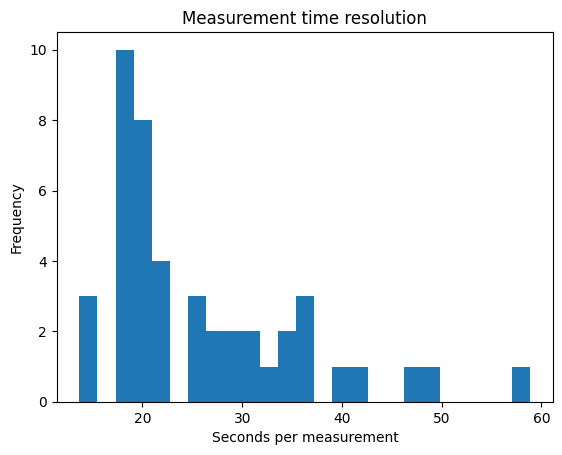

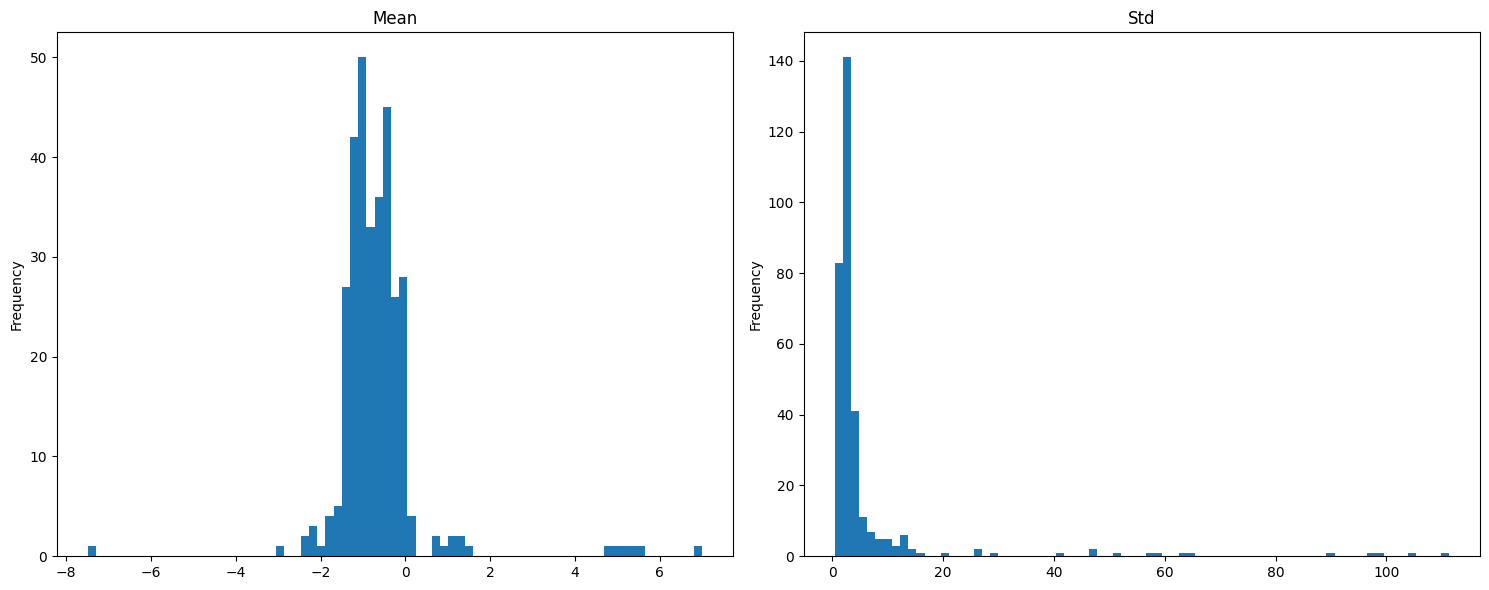

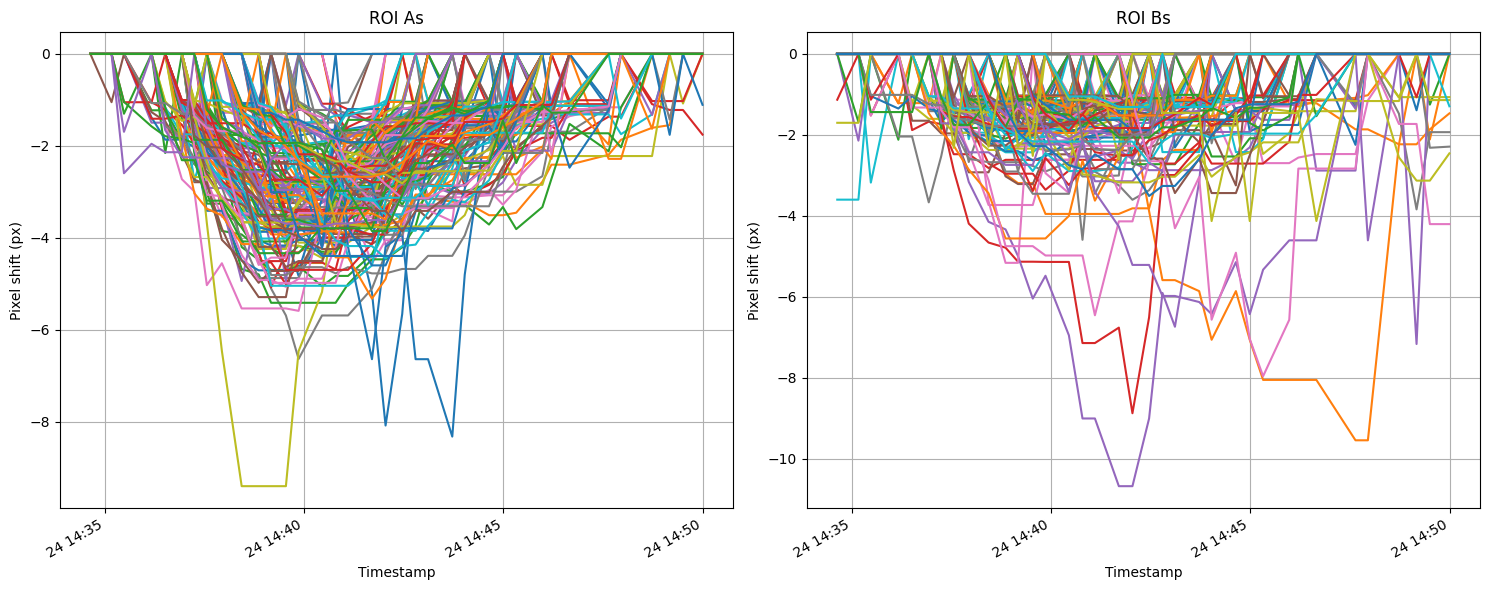

<Axes: ylabel='Frequency'>

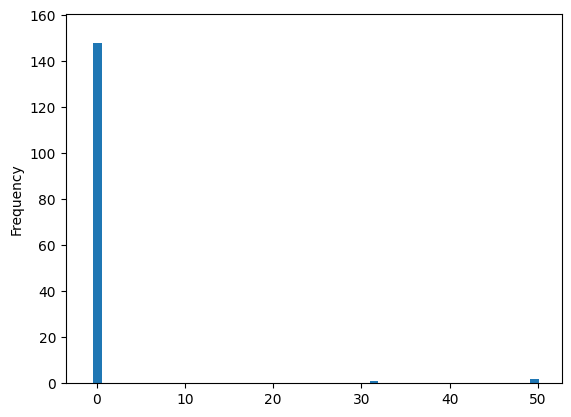

In [229]:
y_limits = (-150, 100)

# Set timewindow of transission
# timewindow = slice('2025-07-24 13:45:00','2025-07-24 14:50:00')
timewindow = slice('2025-07-24 14:30:00','2025-07-24 14:50:00')

# Normalise so that data starts at same value
normalised_df = comb_df[timewindow] - comb_df[timewindow].iloc[0]

# Take differential of data to change transission into a peak
diff_df = normalised_df.diff()

# Calculate time resolution, take differential of index (i.e. image timestamps) and plot as a histogram
time_diffs = pd.Series(diff_df.index).diff()
time_diffs.dt.total_seconds().dropna().plot.hist(
    bins=25,
    title='Measurement time resolution',
    xlabel='Seconds per measurement',
    ylabel='Frequency'
)

# Create DF containing statistics from each ROI (i.e. each column)
stats_df = diff_df.describe().T

# Plot histograms of standard deviation and mean of all ROIs
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
ax = ax.flatten()
stats_df['mean'].plot.hist(
    bins=75,
    ax=ax[0],
    legend=False,
    title='Mean',
)
stats_df['std'].plot.hist(
    bins=75,
    ax=ax[1],
    legend=False,
    title='Std',
)

plt.tight_layout()
plt.show()

# Filter, using std, noisy ROIs (use histogram from previous to workout threshold)
std_threshold = 15
cols_from_describe = stats_df[stats_df['std'] < std_threshold].index
filtered_df = diff_df[cols_from_describe]

# Smooth data using rolling median
window_size = 10
smoothed_df = filtered_df.rolling(window=window_size).median()

# Force all values above/below a value to zero
clip_thresh = -1
thesh_df = smoothed_df.mask(smoothed_df > clip_thresh, 0)

# Plot thresholded data
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
thesh_df.loc[:, thesh_df.columns.str.contains('A')].plot(
    kind='line',
    # ylim=y_limits,
    ax=ax[0],
    legend=False,
    title='ROI As',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)
thesh_df.loc[:, thesh_df.columns.str.contains('B')].plot(
    kind='line',
    # ylim=y_limits,
    ax=ax[1],
    legend=False,
    title='ROI Bs',
    xlabel='Timestamp',
    ylabel='Pixel shift (px)'
)
ax[0].grid(True) # Add a grid for better readability
ax[1].grid(True) # Add a grid for better readability
plt.tight_layout()
plt.show()

# Get timestamp of maximum value from each column (i.e. timestamp of transission)
max_timestamps = thesh_df.idxmax()
mean_overall_timestamp = max_timestamps.mean()  # Get mean timestamp (for scaling time axis), could also use minimum
time_diff = max_timestamps - mean_overall_timestamp

# Convert time_diff (which is currently delta timestamps) to seconds
time_diff_seconds = time_diff.dt.total_seconds()

# Plot histogram of both A and B time differences
time_diff_seconds[time_diff_seconds.index.str.contains("B")].plot.hist(bins=50)
time_diff_seconds[time_diff_seconds.index.str.contains("A")].plot.hist(bins=50)


Plot 'heatmap' of time to transission

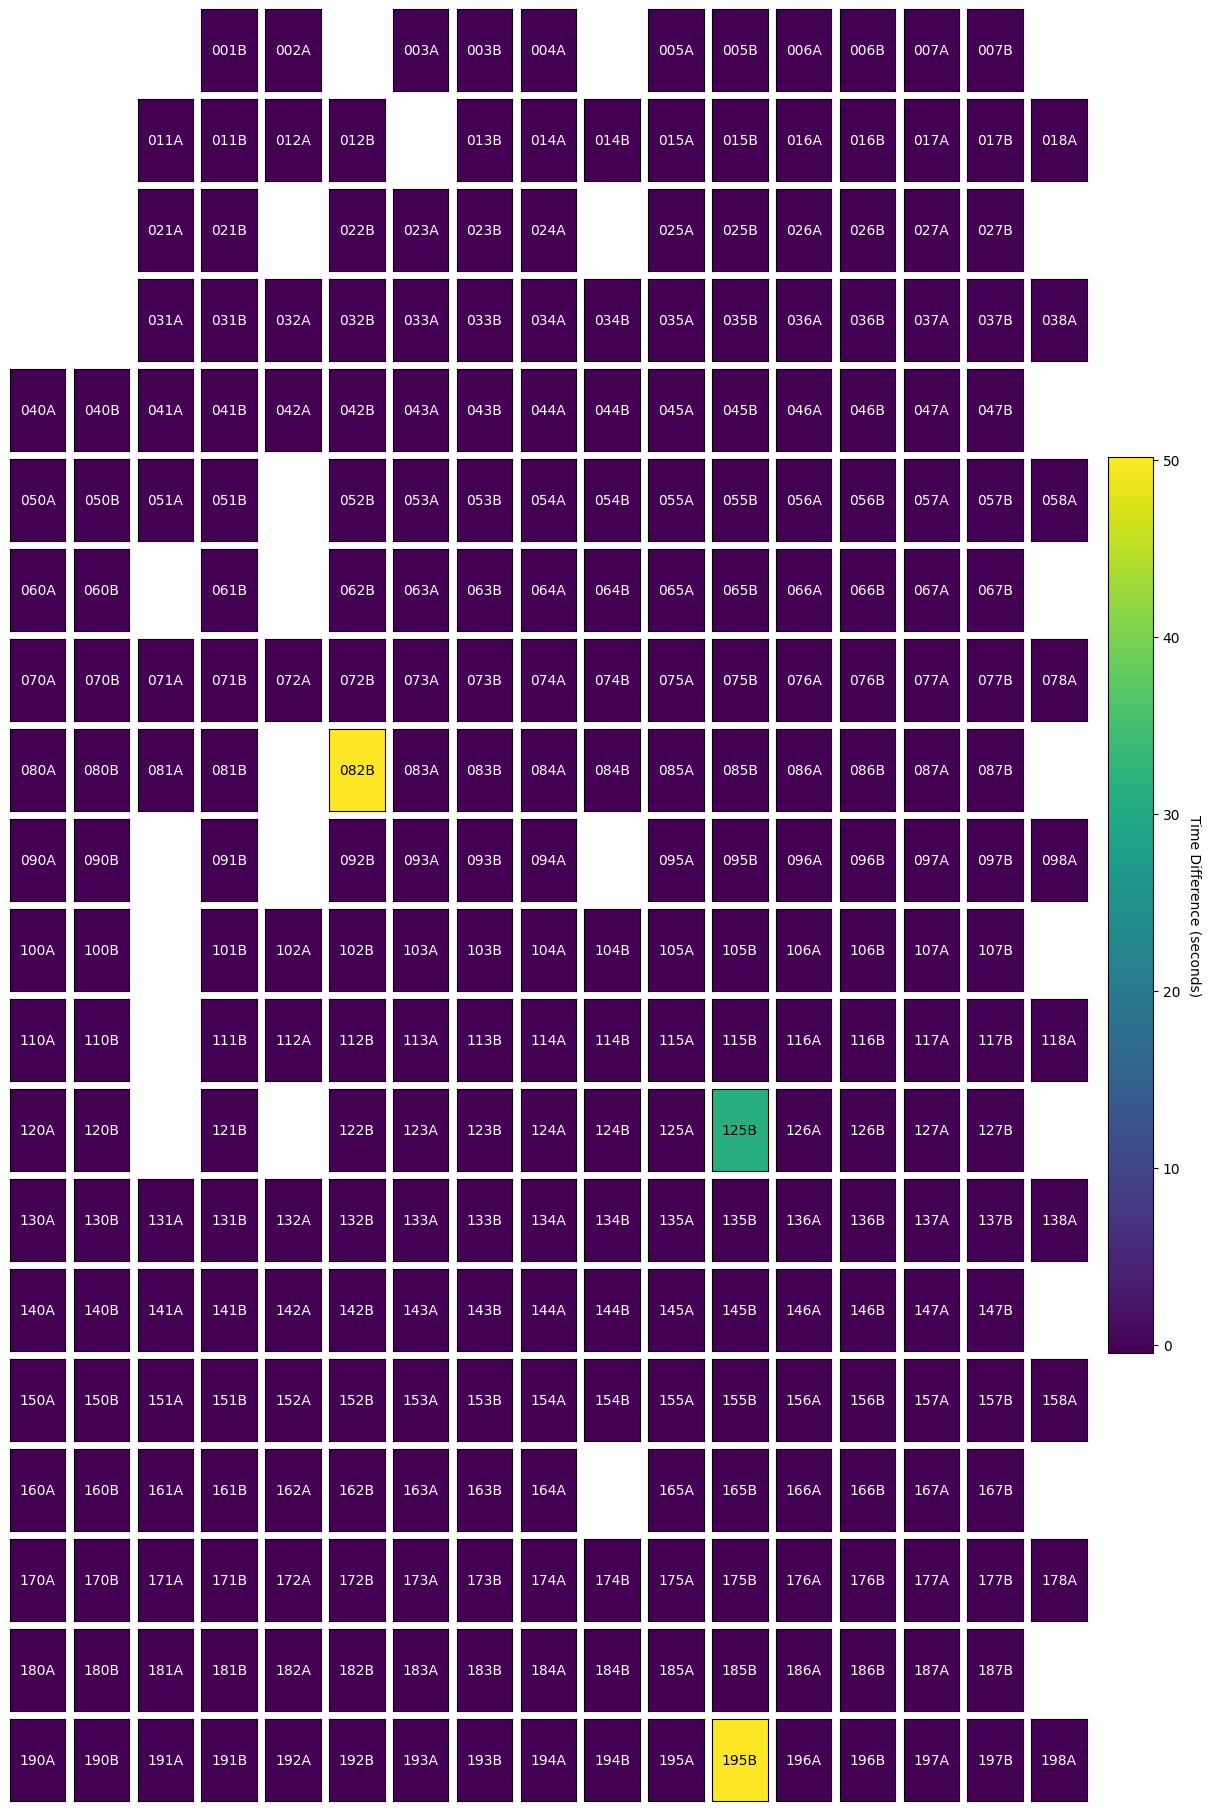

In [179]:
cmap = plt.get_cmap('viridis')
vmin = time_diff_seconds.min()
vmax = time_diff_seconds.max()
norm = mcolors.Normalize(vmin=vmin, vmax=vmax)

roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))


fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(12, 18),
                       constrained_layout=True)
ax = ax.flatten()

count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        ax[count].set_xticks([])
        ax[count].set_yticks([])

        try:
            seconds = time_diff_seconds[roi_label]
            patch_color = cmap(norm(seconds))
            ax[count].set_facecolor(patch_color)
            ax[count].text(0.5, 0.5, roi_label,
                           ha='center', va='center',
                           fontsize=10, color='white' if norm(seconds) < 0.5 else 'black')
        except KeyError:
            ax[count].axis('off')

        count += 1

# Create a ScalarMappable to link the colormap and normalization
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # You have to set a dummy array for this to work

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)
cbar.set_label('Time Difference (seconds)', rotation=270, labelpad=15)

plt.savefig(Path(raw_data.parent, "Array_time_data.png"), dpi=300)

Subtract two images
- test for sample movement

In [34]:
import cv2
import numpy as np

In [174]:
data_path = Path(raw_data.parent.parent, 'data')
image1_path = Path(data_path, 'image_20250724_134513_569672_cam0.png')
image2_path = Path(data_path, 'image_20250724_144026_787965_cam0.png')

In [175]:
try:
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    # Check if images were loaded successfully
    if image1 is None or image2 is None:
        raise FileNotFoundError("Error: Could not load one or both images. Check file paths.")

except FileNotFoundError as e:
    print(e)

print(image1.shape)
print(image2.shape)

(6944, 9152, 3)
(6944, 9152, 3)


In [176]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

diff_brighter = cv2.subtract(image2, image1)
diff_darker = cv2.subtract(image1, image2)

norm_brighter = cv2.normalize(diff_brighter, None, 0, 255, cv2.NORM_MINMAX)
norm_darker = cv2.normalize(diff_darker, None, 0, 255, cv2.NORM_MINMAX)

_, norm_brighter = cv2.threshold(norm_brighter, 25, 255, cv2.THRESH_TOZERO)
_, norm_darker = cv2.threshold(norm_darker, 25, 255, cv2.THRESH_TOZERO)

# Start with a black image of the same size
h, w = image1.shape
color_diff = np.zeros((h, w, 3), dtype=np.uint8)

# Assign the differences to the color channels (OpenCV uses BGR order)
color_diff[:, :, 0] = norm_darker    # Blue channel
color_diff[:, :, 2] = norm_brighter  # Red channel

black_pixels_mask = np.all(color_diff == [0, 0, 0], axis=-1)
color_diff[black_pixels_mask] = [128, 128, 128]

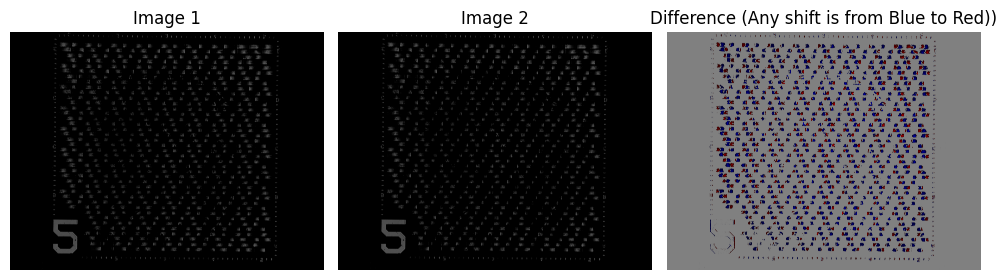

In [177]:
image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2_rgb = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
color_diff_rgb = cv2.cvtColor(color_diff, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 3, figsize=(10, 8))

# Display Original Image 1 (RGB)
axes[0].imshow(image1_rgb)
axes[0].set_title('Image 1')
axes[0].axis('off')

# Display Original Image 2 (RGB)
axes[1].imshow(image2_rgb)
axes[1].set_title('Image 2')
axes[1].axis('off')

# Display Color Difference
axes[2].imshow(color_diff_rgb)
axes[2].set_title('Difference (Any shift is from Blue to Red))')
axes[2].axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

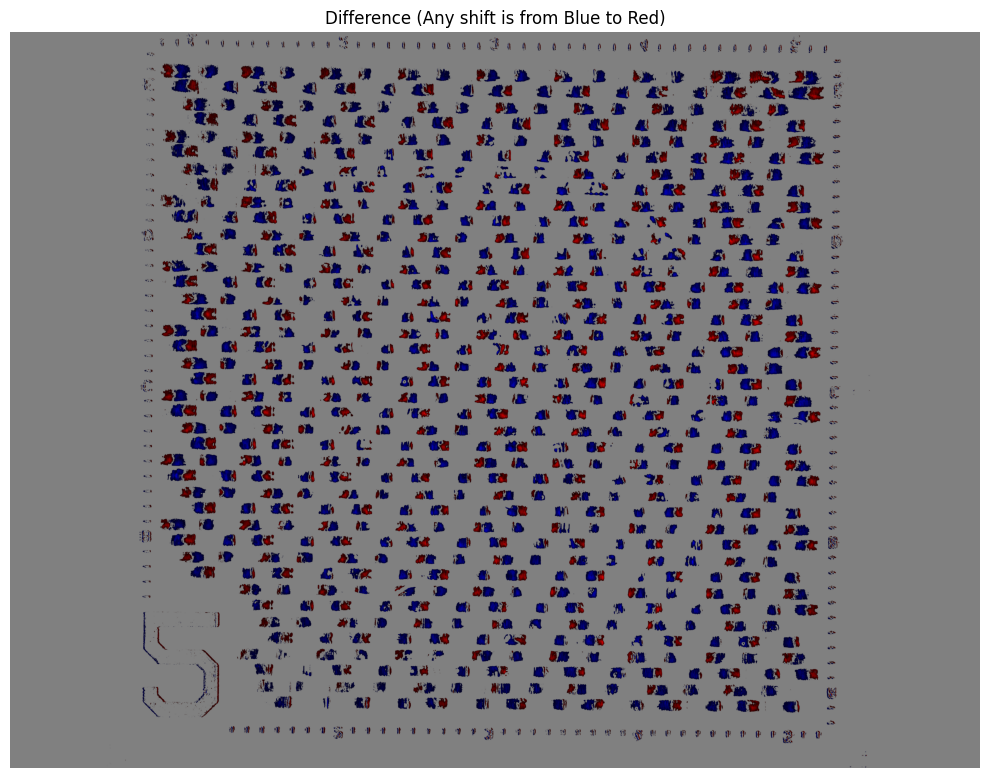

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Display Color Difference
ax.imshow(color_diff_rgb)
ax.set_title('Difference (Any shift is from Blue to Red)')
ax.axis('off')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Grating sensitivity 'heatmap'

count    322.000000
mean      44.493328
std       54.859031
min     -295.611500
25%       28.864250
50%       51.451000
75%       69.435750
max      344.648500
dtype: float64


<Axes: ylabel='Frequency'>

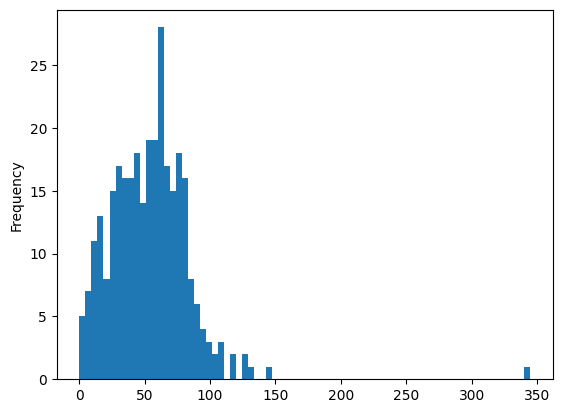

In [230]:
y_limits = (-150, 100)

# Set timewindow of data
timewindow = slice('2025-07-24 13:45:00','2025-07-24 14:50:00')

# Normalise so that data starts at same value
normalised_df = comb_df[timewindow] - comb_df[timewindow].iloc[0]

# Set timewindows of two 'flat' regions
timewindow_1 = slice('2025-07-24 14:00:00','2025-07-24 14:10:00')
timewindow_2 = slice('2025-07-24 14:43:00','2025-07-24 14:50:00')

# Get timestamp of maximum value from each column (i.e. timestamp of transission)
sensitivities = normalised_df[timewindow_1].median() - normalised_df[timewindow_2].median()
# print(sensitivities.head)
print(sensitivities.describe())
sensitivities[sensitivities>0].plot.hist(bins=75)

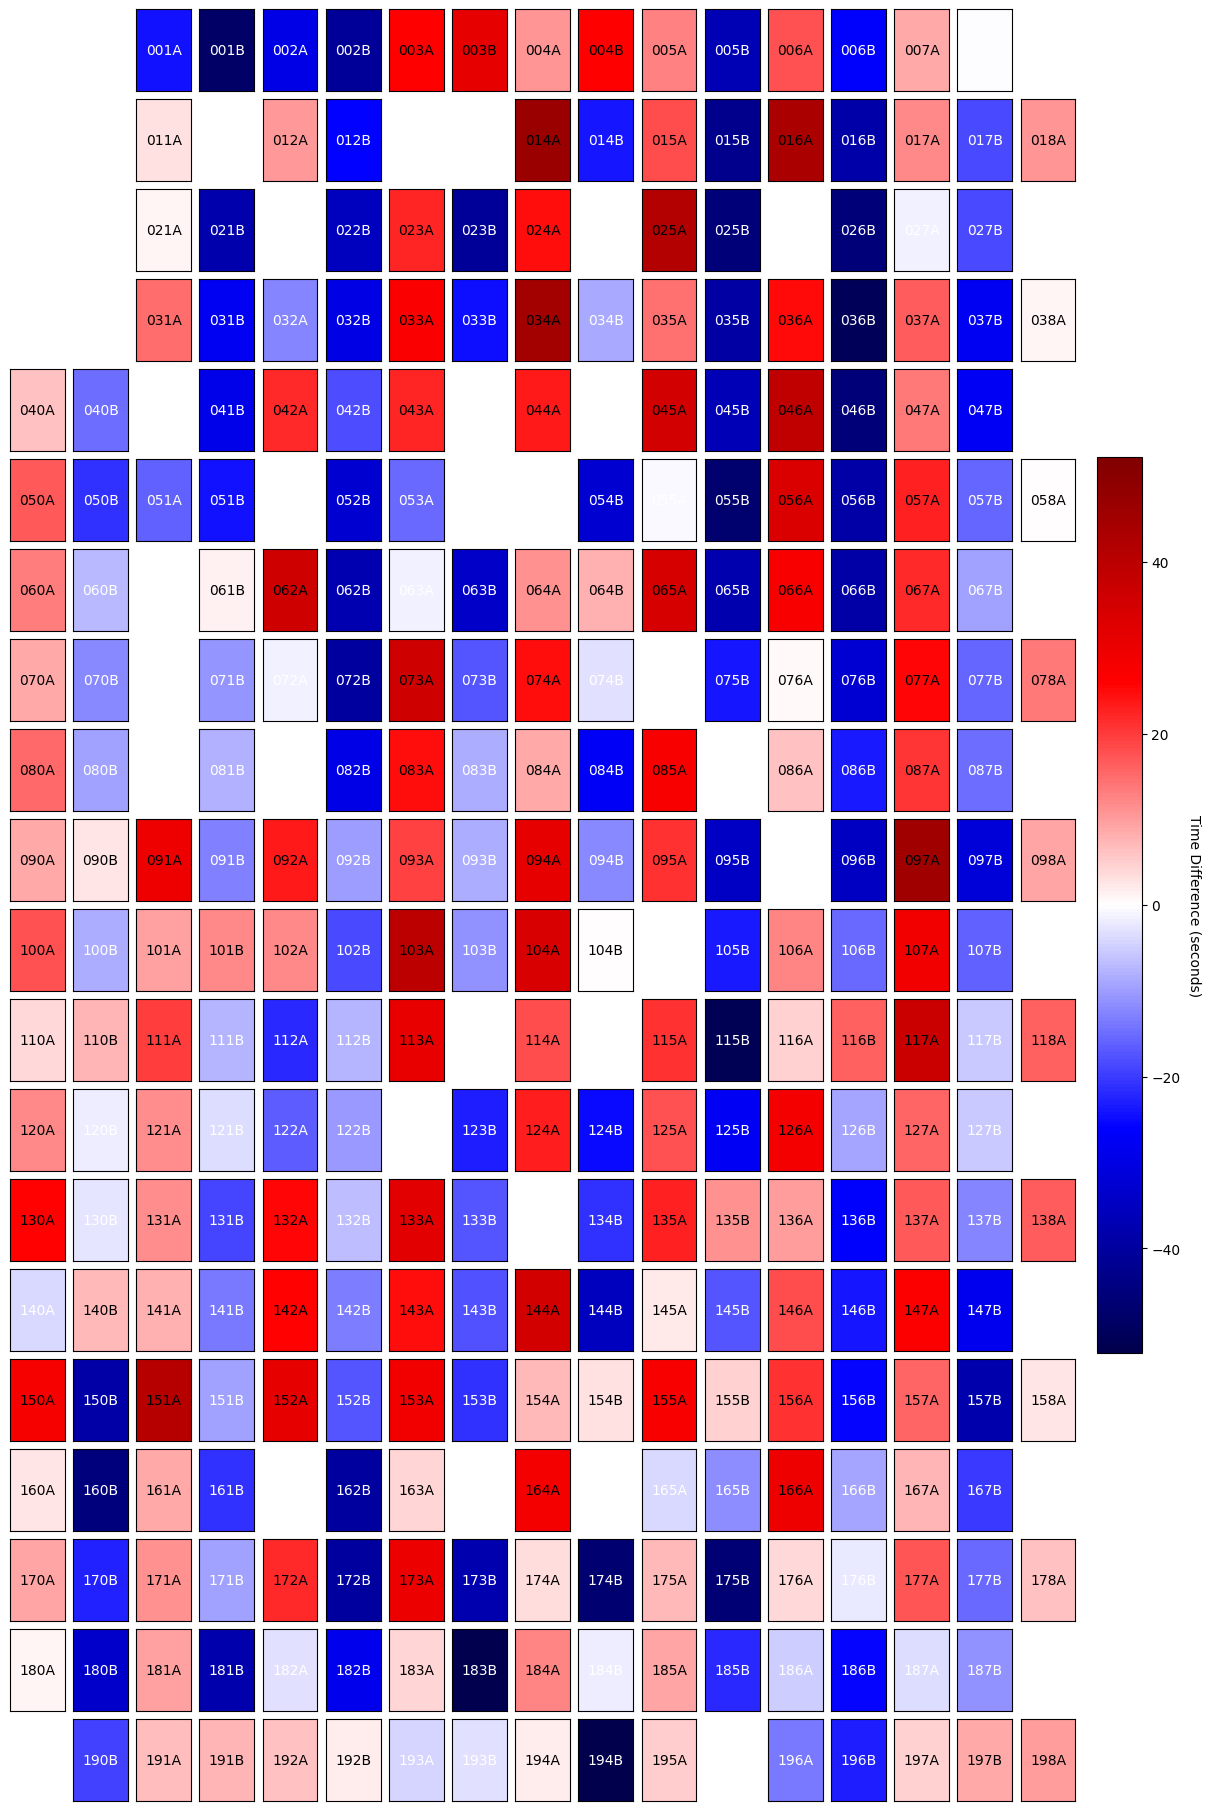

In [231]:
cmap = plt.get_cmap('seismic')
sensitivities = sensitivities[sensitivities > 0]
sensitivities = sensitivities[sensitivities < 100]
sensitivities = sensitivities - sensitivities.median()
vmin = sensitivities.min()
vmax = sensitivities.max()
scale_val = max(abs(vmin), abs(vmax))
norm = mcolors.Normalize(vmin=-scale_val, vmax=scale_val)

roi_x_nums = sorted(list(set([roi[2:] for roi in rois])))
roi_y_nums = sorted(list(set([roi[:2] for roi in rois])))


fig, ax = plt.subplots(len(roi_y_nums), len(roi_x_nums),
                       figsize=(12, 18),
                       constrained_layout=True)
ax = ax.flatten()

count = 0
for y in roi_y_nums:
    for x in roi_x_nums:
        roi_label = f"{y}{x}"
        ax[count].set_xticks([])
        ax[count].set_yticks([])

        try:
            sensitivity = sensitivities[roi_label]
            patch_color = cmap(norm(sensitivity))
            ax[count].set_facecolor(patch_color)
            ax[count].text(0.5, 0.5, roi_label,
                           ha='center', va='center',
                           fontsize=10, color='white' if norm(sensitivity) < 0.5 else 'black')
        except KeyError:
            ax[count].axis('off')

        count += 1

# Create a ScalarMappable to link the colormap and normalization
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # You have to set a dummy array for this to work

cbar = fig.colorbar(sm, ax=ax, orientation='vertical', pad=0.02, shrink=0.5)
cbar.set_label('Time Difference (seconds)', rotation=270, labelpad=15)

plt.savefig(Path(raw_data.parent, "Array_sensitivity_data.png"), dpi=300)